In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,PowerTransformer
import math  
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df=pd.read_csv(r"/kaggle/input/obesity-levels/ObesityDataSet_raw_and_data_sinthetic.csv")
data=pd.read_csv(r"/kaggle/input/obesity-levels/ObesityDataSet_raw_and_data_sinthetic.csv")
train=pd.read_csv(r"/kaggle/input/playground-series-s4e2/train.csv")
test=pd.read_csv(r"/kaggle/input/playground-series-s4e2/test.csv")
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
df.info

<bound method DataFrame.info of             Age  Gender    Height      Weight        CALC FAVC  FCVC  NCP  \
0     21.000000  Female  1.620000   64.000000          no   no   2.0  3.0   
1     21.000000  Female  1.520000   56.000000   Sometimes   no   3.0  3.0   
2     23.000000    Male  1.800000   77.000000  Frequently   no   2.0  3.0   
3     27.000000    Male  1.800000   87.000000  Frequently   no   3.0  3.0   
4     22.000000    Male  1.780000   89.800000   Sometimes   no   2.0  1.0   
...         ...     ...       ...         ...         ...  ...   ...  ...   
2106  20.976842  Female  1.710730  131.408528   Sometimes  yes   3.0  3.0   
2107  21.982942  Female  1.748584  133.742943   Sometimes  yes   3.0  3.0   
2108  22.524036  Female  1.752206  133.689352   Sometimes  yes   3.0  3.0   
2109  24.361936  Female  1.739450  133.346641   Sometimes  yes   3.0  3.0   
2110  23.664709  Female  1.738836  133.472641   Sometimes  yes   3.0  3.0   

      SCC SMOKE      CH2O family_history_wi

In [4]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [5]:
df.shape

(2111, 17)

In [6]:
df.dtypes

Age                               float64
Gender                             object
Height                            float64
Weight                            float64
CALC                               object
FAVC                               object
FCVC                              float64
NCP                               float64
SCC                                object
SMOKE                              object
CH2O                              float64
family_history_with_overweight     object
FAF                               float64
TUE                               float64
CAEC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [7]:
df.isnull().sum()

Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [8]:
encoder = LabelEncoder()
df["Gender"]=encoder.fit_transform(df["Gender"])
df["SMOKE"]=encoder.fit_transform(df["SMOKE"])
df["SCC"]=encoder.fit_transform(df["SCC"])
df["FAVC"]
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,0,1.62,64.0,no,no,2.0,3.0,0,0,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,0,1.52,56.0,Sometimes,no,3.0,3.0,1,1,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,1,1.80,77.0,Frequently,no,2.0,3.0,0,0,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,1,1.80,87.0,Frequently,no,3.0,3.0,0,0,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,1,1.78,89.8,Sometimes,no,2.0,1.0,0,0,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [9]:
df['SMOKE'] = encoder.inverse_transform(df['SMOKE'])

In [10]:
df.value_counts()[1:]

Age   Gender  Height  Weight  CALC        FAVC  FCVC  NCP  SCC  SMOKE  CH2O  family_history_with_overweight  FAF  TUE  CAEC        MTRANS                 NObeyesdad         
21.0  0       1.52    42.0    Sometimes   yes   3.0   1.0  0    no     1.0   no                              0.0  0.0  Frequently  Public_Transportation  Insufficient_Weight    4
                                          no    3.0   1.0  0    no     1.0   no                              0.0  0.0  Frequently  Public_Transportation  Insufficient_Weight    2
18.0  1       1.72    53.0    Sometimes   yes   2.0   3.0  0    no     2.0   yes                             0.0  2.0  Sometimes   Public_Transportation  Insufficient_Weight    2
25.0  0       1.57    55.0    Sometimes   yes   2.0   1.0  0    no     2.0   no                              2.0  0.0  Sometimes   Public_Transportation  Normal_Weight          2
22.0  0       1.69    65.0    Sometimes   yes   2.0   3.0  0    no     2.0   yes                             1

In [11]:
for column in df.columns:
    if df[column].dtype == "float64" and column != "Height":
        df[column]=df[column].astype(int)
        
df

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,0,1.620000,64,no,no,2,3,0,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,0,1.520000,56,Sometimes,no,3,3,1,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,1,1.800000,77,Frequently,no,2,3,0,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,1,1.800000,87,Frequently,no,3,3,0,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,1,1.780000,89,Sometimes,no,2,1,0,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20,0,1.710730,131,Sometimes,yes,3,3,0,no,1,yes,1,0,Sometimes,Public_Transportation,Obesity_Type_III
2107,21,0,1.748584,133,Sometimes,yes,3,3,0,no,2,yes,1,0,Sometimes,Public_Transportation,Obesity_Type_III
2108,22,0,1.752206,133,Sometimes,yes,3,3,0,no,2,yes,1,0,Sometimes,Public_Transportation,Obesity_Type_III
2109,24,0,1.739450,133,Sometimes,yes,3,3,0,no,2,yes,1,0,Sometimes,Public_Transportation,Obesity_Type_III


In [12]:
max_weight=df.groupby("Weight")["Height"].count().sort_values(ascending=False).head(6)
max_weight_df = pd.DataFrame({'Weight': max_weight.index, 'Count': max_weight.values})
max_weight_df

,Weight,Count
0,80,91
1,75,62
2,82,61
3,50,59
4,111,53
5,104,50


In [13]:
# As we can see most of the people who got in that data weights mostly being 80 by 91 people.

/tmp/ipykernel_18/2643612196.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


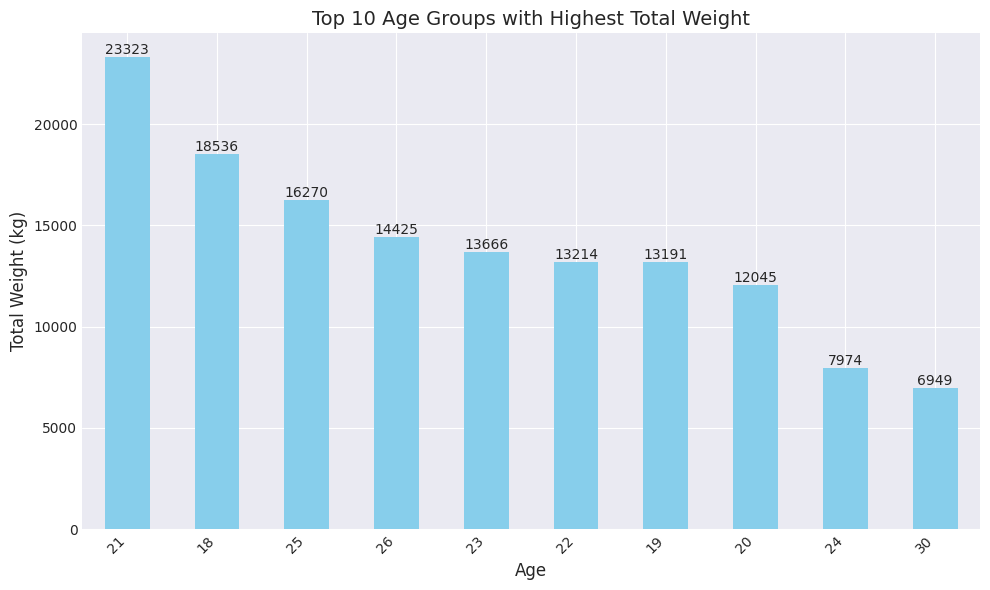

In [14]:
plt.figure(figsize=(10, 6))
plt.style.use('seaborn-darkgrid')

df.groupby("Age")["Weight"].sum().sort_values(ascending=False).head(10).plot(kind="bar", color='skyblue')

plt.xlabel("Age", fontsize=12)
plt.ylabel("Total Weight (kg)", fontsize=12)
plt.title("Top 10 Age Groups with Highest Total Weight", fontsize=14)
plt.xticks(rotation=45, ha='right')  

for i, v in enumerate(df.groupby("Age")["Weight"].sum().sort_values(ascending=False).head(10)):
    plt.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=10)

plt.tight_layout()  
plt.show()

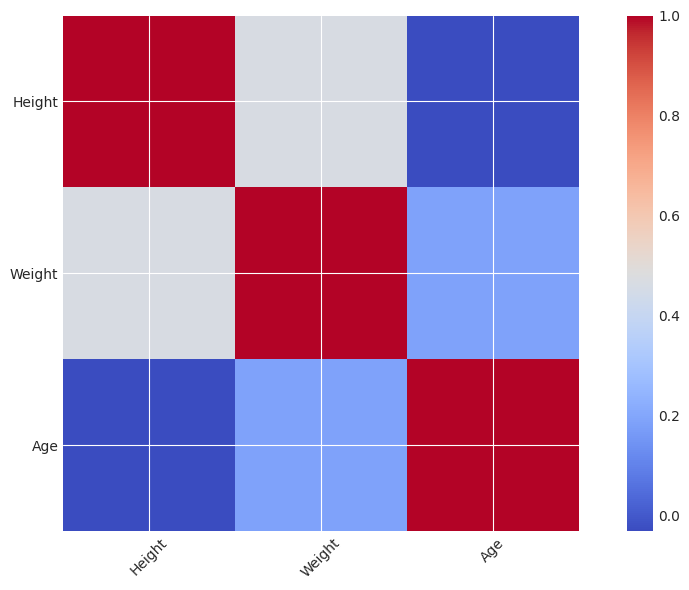

In [15]:
correlation=df[["Height","Weight","Age"]].corr()
plt.figure(figsize=(10, 6))
plt.imshow(correlation,cmap="coolwarm",interpolation="nearest")
plt.colorbar()
plt.xticks(range(len(correlation.columns)), correlation.columns, rotation=45)
plt.yticks(range(len(correlation.columns)), correlation.columns)
plt.tight_layout()
plt.show()

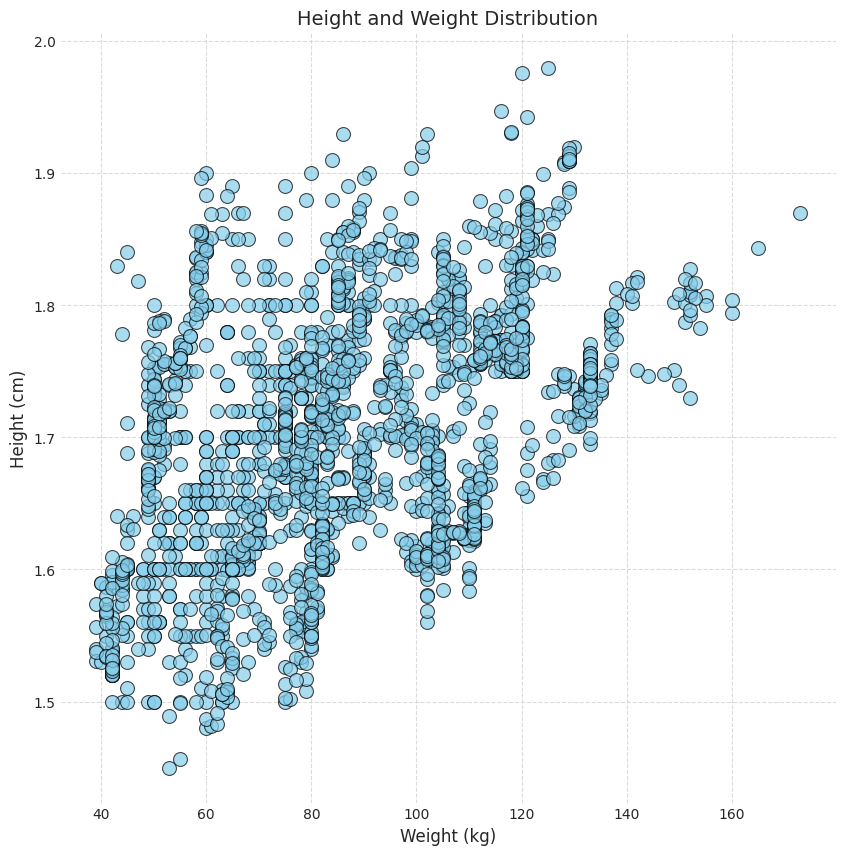

In [16]:
plt.figure(figsize=(10, 10))
sns.set_style("whitegrid")
sns.scatterplot(x="Weight", y="Height", data=df, color='skyblue', edgecolor='black', s=100, alpha=0.7)
plt.title("Height and Weight Distribution", fontsize=14)
plt.xlabel("Weight (kg)", fontsize=12)
plt.ylabel("Height (cm)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [17]:
df2=df[["SMOKE","FAVC","family_history_with_overweight","CAEC","Age"]]

In [18]:
categ_col = df2.select_dtypes(include = ['object']).columns
print(categ_col)

Index(['SMOKE', 'FAVC', 'family_history_with_overweight', 'CAEC'], dtype='object')


SMOKE



<Figure size 800x600 with 0 Axes>

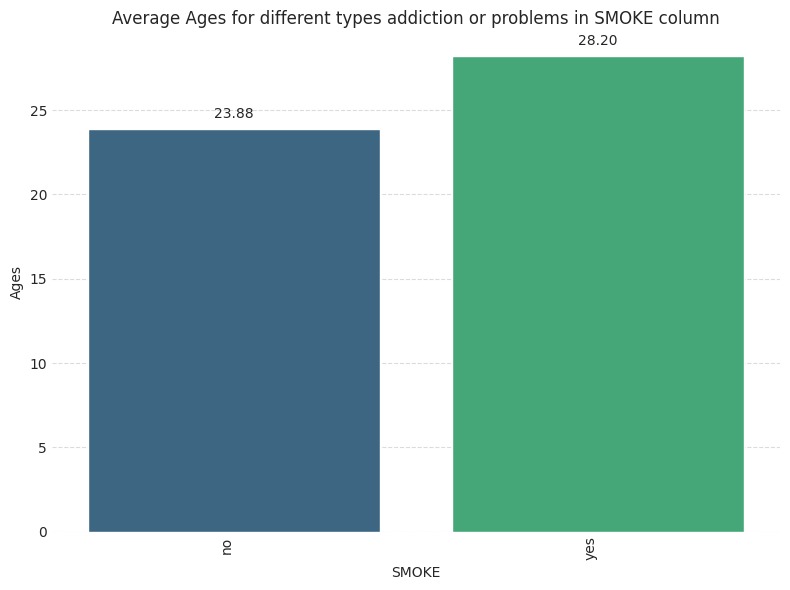

FAVC



<Figure size 800x600 with 0 Axes>

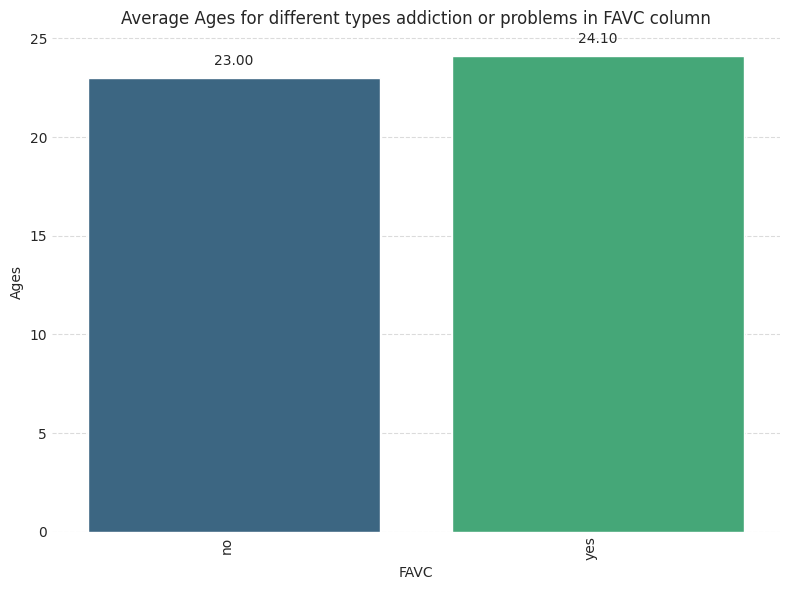

family_history_with_overweight



<Figure size 800x600 with 0 Axes>

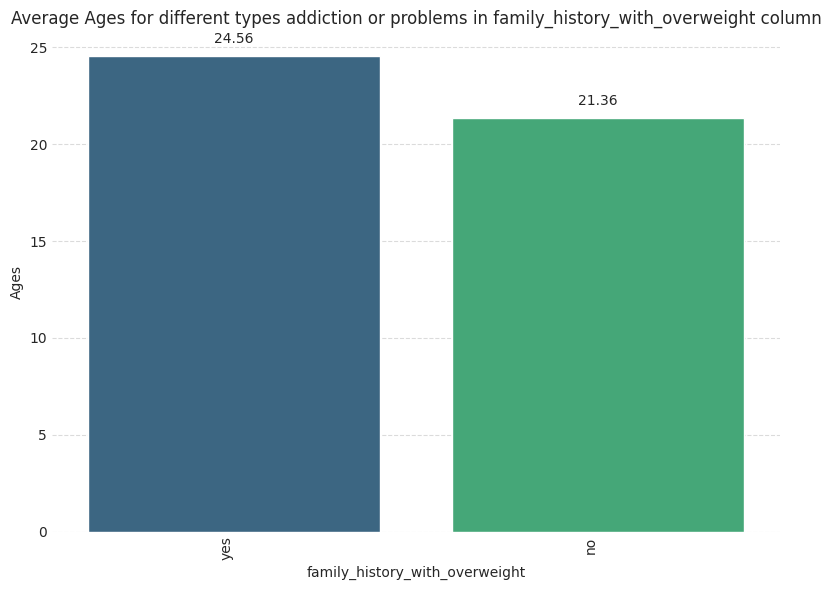

CAEC



<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

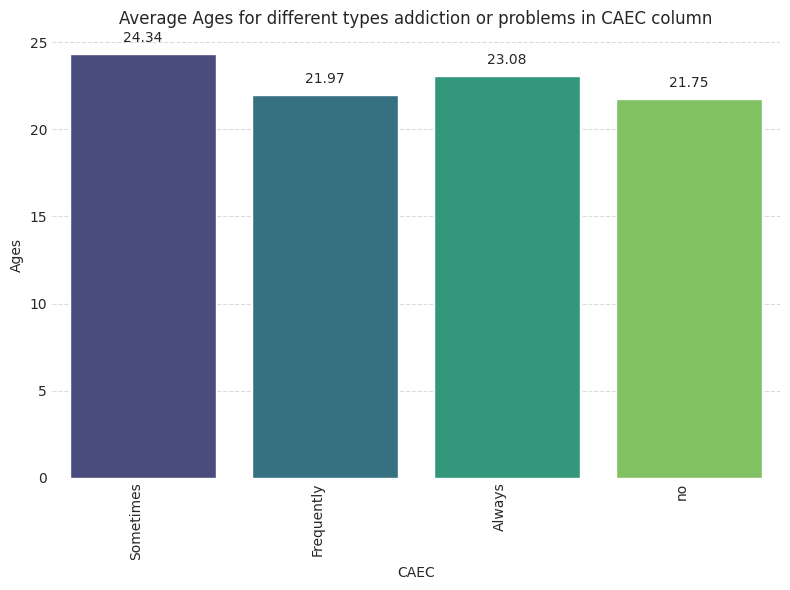

In [19]:
for col in categ_col:
    print(f"{col}\n")
    labels = df2[col].unique()
    prices = []
    for label in labels:
        plt.figure(figsize=(8, 6))
        price = df2.loc[df2[col] == label,'Age'].mean()
        prices.append(price)
    sns.barplot(x = labels,y = prices, palette="viridis")
    plt.title(f"Average Ages for different types addiction or problems in {col} column")
    plt.xlabel(col)
    plt.ylabel('Ages')
    plt.xticks(rotation = 90,ha='right')
    plt.grid(axis="y", linestyle='--', alpha=0.7)
    for i, v in enumerate(prices):
        plt.text(i, v + 0.5, f'{v:.2f}', ha='center', va='bottom', fontsize=10)
    plt.tight_layout()
    plt.show()

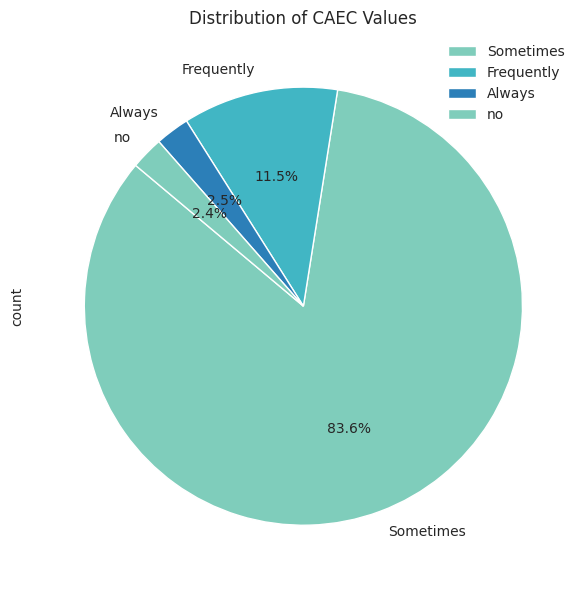

In [20]:
plt.figure(figsize=(8, 6))
caec_labels = df['CAEC'].unique()
colors = ['#7fcdbb', '#41b6c4', '#2c7fb8']
caec=df["CAEC"].value_counts().plot(kind="pie",autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Distribution of CAEC Values')
plt.gca().set_aspect('equal') 
plt.legend(labels=caec_labels, loc='best')
plt.tight_layout()
plt.show()

In [21]:
#Start to pred data model

In [22]:
data.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [23]:
columns=['Gender','family_history_with_overweight','FAVC','SMOKE','SCC']
train=pd.get_dummies(train,columns=columns,drop_first=True,dtype=int)
test=pd.get_dummies(test,columns=columns,drop_first=True,dtype=int)


le=LabelEncoder()
a=['CAEC','CALC','MTRANS']
for i in a:
    train[i]=le.fit_transform(train[i])
    test[i]=le.fit_transform(test[i])

train['NObeyesdad']=le.fit_transform(train['NObeyesdad'])

In [24]:
train["NObeyesdad"].value_counts()

NObeyesdad
4    4046
3    3248
1    3082
2    2910
0    2523
6    2522
5    2427
Name: count, dtype: int64

In [25]:
pt = PowerTransformer(method='yeo-johnson')
train_features = train.drop('NObeyesdad', axis=1)
train_features_scaled = pt.fit_transform(train_features)

train_scaled = pd.DataFrame(train_features_scaled, columns=train_features.columns)
train_scaled['NObeyesdad'] = train['NObeyesdad']

In [26]:
train_scaled

,id,Age,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,MTRANS,Gender_Male,family_history_with_overweight_yes,FAVC_yes,SMOKE_yes,SCC_yes,NObeyesdad
0,-2.193746,0.392273,0.001826,-0.180944,-0.882621,0.182365,0.261059,1.232230,-1.320341,0.775163,-0.421744,0.359015,1.004152,0.469099,0.30588,-0.109287,-0.185009,6
1,-2.191648,-1.379784,-1.613755,-1.189908,-0.882621,0.217247,-1.923122,-0.084861,0.200903,0.804524,1.560984,-2.041050,-0.995866,0.469099,0.30588,-0.109287,-0.185009,1
2,-2.189850,-1.379784,0.133016,-1.495630,-1.077494,-1.817734,0.261059,-0.232407,0.041157,1.483281,1.560984,0.359015,-0.995866,0.469099,0.30588,-0.109287,-0.185009,0
3,-2.188223,-0.403279,0.124665,1.562234,1.072753,0.217247,0.261059,-0.613803,0.696094,0.509587,-0.421744,0.359015,-0.995866,0.469099,0.30588,-0.109287,-0.185009,4
4,-2.186712,1.384082,2.427755,0.274031,0.383134,-1.357225,0.261059,-0.118174,1.144539,0.717945,-0.421744,0.359015,1.004152,0.469099,0.30588,-0.109287,-0.185009,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,1.553353,0.518774,0.762210,0.993953,0.894011,0.217247,0.261059,0.168581,0.559569,-0.605397,-0.421744,0.359015,1.004152,0.469099,0.30588,-0.109287,-0.185009,3
20754,1.553480,-1.379784,0.116314,-1.503223,1.072753,3.013471,-1.923122,-1.635368,1.171026,0.804524,-0.421744,0.359015,1.004152,-2.131745,0.30588,-0.109287,-0.185009,0
20755,1.553608,-0.649421,1.362528,0.696208,-0.155265,0.217247,0.261059,-0.084861,0.378172,1.034361,1.560984,0.359015,1.004152,0.469099,0.30588,-0.109287,-0.185009,3
20756,1.553736,1.587449,0.001848,-0.110046,0.365801,-1.357225,0.261059,0.156848,-1.320341,0.771840,1.560984,-2.041050,1.004152,0.469099,0.30588,-0.109287,-0.185009,6


In [27]:
def remove_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]
    return data

train_scaled = remove_outliers(train_scaled)

In [28]:
train_scaled

,id,Age,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,MTRANS,Gender_Male,family_history_with_overweight_yes,FAVC_yes,SMOKE_yes,SCC_yes,NObeyesdad
3,-2.188223,-0.403279,0.124665,1.562234,1.072753,0.217247,0.261059,-0.613803,0.696094,0.509587,-0.421744,0.359015,-0.995866,0.469099,0.30588,-0.109287,-0.185009,4
5,-2.185287,-1.329292,0.556150,-1.432450,0.894378,0.217247,0.261059,0.144591,1.112847,0.804524,-0.421744,0.359015,1.004152,0.469099,0.30588,-0.109287,-0.185009,0
9,-2.180163,0.664581,-0.700945,0.894164,1.072753,0.217247,0.261059,0.998422,-1.320341,-0.550412,-0.421744,0.359015,-0.995866,0.469099,0.30588,-0.109287,-0.185009,4
10,-2.178984,-0.680313,-0.572321,-0.848176,1.072753,0.217247,0.261059,1.660364,0.200903,-1.169987,-0.421744,0.359015,-0.995866,0.469099,0.30588,-0.109287,-0.185009,5
13,-2.175622,-0.280238,0.333977,1.570486,1.072753,0.217247,0.261059,-0.151679,0.654890,0.738822,-0.421744,0.359015,-0.995866,0.469099,0.30588,-0.109287,-0.185009,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20746,1.552458,-1.379784,-1.033903,-0.890037,1.072753,0.217247,0.261059,-0.084861,0.200903,0.804524,-0.421744,0.359015,-0.995866,0.469099,0.30588,-0.109287,-0.185009,1
20749,1.552841,0.629183,-0.613896,0.670027,1.072753,0.217247,0.261059,-0.839107,-1.287620,-0.053203,-0.421744,0.359015,-0.995866,0.469099,0.30588,-0.109287,-0.185009,4
20751,1.553097,-0.381898,-1.086016,1.633147,1.072753,0.217247,0.261059,1.367950,0.898054,-0.744088,-0.421744,0.359015,-0.995866,0.469099,0.30588,-0.109287,-0.185009,4
20753,1.553353,0.518774,0.762210,0.993953,0.894011,0.217247,0.261059,0.168581,0.559569,-0.605397,-0.421744,0.359015,1.004152,0.469099,0.30588,-0.109287,-0.185009,3


In [29]:
b=['CALC','NCP']
for i in b:
    train=train.drop(i,axis=1)

In [30]:
X = train_scaled.drop('NObeyesdad', axis=1)
y = train_scaled['NObeyesdad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
rf = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=20, min_samples_split=2, min_samples_leaf=1,
                              criterion='gini', bootstrap=True,
                             class_weight=None, ccp_alpha=0.0, max_samples=None)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [32]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=42, n_estimators=100, max_depth=20, min_samples_split=2, min_samples_leaf=1)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:', classification_report(y_test, y_pred))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred))

/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [13:50:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9665970772442589
Classification Report:               precision    recall  f1-score   support

           0       0.91      0.94      0.92        31
           1       0.92      0.87      0.89        78
           2       0.94      0.91      0.92       106
           3       0.99      0.99      0.99       255
           4       1.00      1.00      1.00       822
           5       0.81      0.86      0.83        90
           6       0.79      0.84      0.81        55

    accuracy                           0.97      1437
   macro avg       0.91      0.91      0.91      1437
weighted avg       0.97      0.97      0.97      1437

Confusion Matrix: [[ 29   2   0   0   0   0   0]
 [  2  68   1   0   0   6   1]
 [  0   0  96   1   0   5   4]
 [  0   0   2 253   0   0   0]
 [  0   0   0   1 820   1   0]
 [  1   4   1   0   0  77   7]
 [  0   0   2   1   0   6  46]]


In [33]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9665970772442589
              precision    recall  f1-score   support

           0       0.91      0.94      0.92        31
           1       0.92      0.87      0.89        78
           2       0.94      0.91      0.92       106
           3       0.99      0.99      0.99       255
           4       1.00      1.00      1.00       822
           5       0.81      0.86      0.83        90
           6       0.79      0.84      0.81        55

    accuracy                           0.97      1437
   macro avg       0.91      0.91      0.91      1437
weighted avg       0.97      0.97      0.97      1437

[[ 29   2   0   0   0   0   0]
 [  2  68   1   0   0   6   1]
 [  0   0  96   1   0   5   4]
 [  0   0   2 253   0   0   0]
 [  0   0   0   1 820   1   0]
 [  1   4   1   0   0  77   7]
 [  0   0   2   1   0   6  46]]
